#  ResNet50

In [1]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet', include_top=True)

# Function to preprocess an image and obtain its embedding using the model
def get_image_embedding(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    embedding = model.predict(img_array)
    return embedding.flatten()  # Flatten the embedding to make it one-dimensional

# Paths to the positive, negative, and unseen images
positive_image_path = 'img/1.png'
negative_image_path = 'img/2.png'
unseen_image_path = 'img/3.png'

# Obtain embeddings for the positive, negative, and unseen images
positive_embedding = get_image_embedding(positive_image_path)
negative_embedding = get_image_embedding(negative_image_path)
unseen_embedding = get_image_embedding(unseen_image_path)

# Function to classify the unseen image based on its embedding
def classify_image(positive_embedding, negative_embedding, unseen_embedding, margin=0.2):
    # Compute distances
    pos_dist = np.sum(np.square(positive_embedding - unseen_embedding))
    neg_dist = np.sum(np.square(negative_embedding - unseen_embedding))
    
    # Check if the unseen image is closer to the positive or negative example by the specified margin
    if pos_dist < neg_dist - margin:
        class_label = "Positive"
    else:
        class_label = "Negative"
    
    return class_label

# Classify the unseen image
result = classify_image(positive_embedding, negative_embedding, unseen_embedding)
print("Unseen image is classified as:", result)


102967424/102967424 [==============================] - 102s 1us/step


2024-02-16 07:11:42.143317: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 84ms/step
Unseen image is classified as: Negative



We first load the pre-trained ResNet50 model with weights trained on the ImageNet dataset.


We define a function get_image_embedding to preprocess an image, obtain its embedding using the ResNet50 model, and flatten the embedding.


We specify the paths to the positive, negative, and unseen images.


We obtain embeddings for the positive, negative, and unseen images using the get_image_embedding function.


We define a function classify_image to classify the unseen image based on its embedding by comparing its distances to the positive and negative embeddings.


Finally, we classify the unseen image and print the result.



1/1 [==============================] - 1s 534ms/step
Unseen image is classified as: Negative


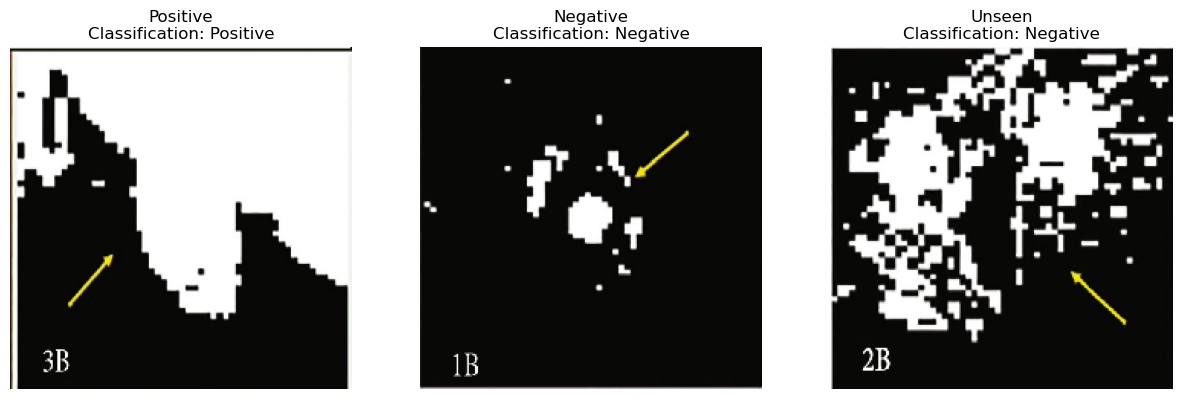

In [6]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt

# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet', include_top=True)

# Function to preprocess an image and obtain its embedding using the model
def get_image_embedding(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    embedding = model.predict(img_array)
    return embedding.flatten(), img  # Return both the embedding and the image

# Paths to the positive, negative, and unseen images
positive_image_path = 'img/1.png'
negative_image_path = 'img/2.png'
unseen_image_path = 'img/3.png'

# Obtain embeddings for the positive, negative, and unseen images, and load the images
positive_embedding, positive_img = get_image_embedding(positive_image_path)
negative_embedding, negative_img = get_image_embedding(negative_image_path)
unseen_embedding, unseen_img = get_image_embedding(unseen_image_path)

# Function to classify the unseen image based on its embedding
def classify_image(positive_embedding, negative_embedding, unseen_embedding, margin=0.2):
    # Compute distances
    pos_dist = np.sum(np.square(positive_embedding - unseen_embedding))
    neg_dist = np.sum(np.square(negative_embedding - unseen_embedding))
    
    # Check if the unseen image is closer to the positive or negative example by the specified margin
    if pos_dist < neg_dist - margin:
        class_label = "Positive"
    else:
        class_label = "Negative"
    
    return class_label

# Classify the unseen image
result = classify_image(positive_embedding, negative_embedding, unseen_embedding)
print("Unseen image is classified as:", result)

# Plot the images with their classifications
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(positive_img)
axs[0].set_title('Positive\nClassification: Positive')
axs[0].axis('off')
axs[1].imshow(negative_img)
axs[1].set_title('Negative\nClassification: Negative')
axs[1].axis('off')
axs[2].imshow(unseen_img)
axs[2].set_title('Unseen\nClassification: ' + result)
axs[2].axis('off')
plt.show()


## Transfer leanrning the ResNet50 using 20 images for each class

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False)

# Define a new model on top of the pre-trained base model
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))  # Add your own dense layer for classification
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Freeze the layers of the pre-trained base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Load and preprocess images for transfer learning
positive_image_paths = ['img/positive/{}.jpg'.format(i) for i in range(1, 21)]
negative_image_paths = ['img/negative/{}.jpg'.format(i) for i in range(1, 21)]

# Combine positive and negative image paths and labels
all_image_paths = positive_image_paths + negative_image_paths
labels = [1] * len(positive_image_paths) + [0] * len(negative_image_paths)

# Load and preprocess images
images = []
for img_path in all_image_paths:
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    images.append(img_array)
X_train = np.array(images)
y_train = np.array(labels)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Now your model is fine-tuned on the 20 images per class dataset
# You can use it to classify the unseen images
